#K-Fold

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn import preprocessing

In [ ]:
df = pd.read_csv('https://docs.google.com/spreadsheets/d/e/2PACX-1vTSqsiFnr5ElIAwqer2XJTrdMNNNJ62wXvmsg-dH0S_e8D9lZXPSNVEEeC2F7c9VT-ZGPGqf90ej8N2/pub?gid=1385368211&single=true&output=csv')
df

,x1,x2,x3,x4,x5,x6,x7,x8,y
0,58.76,123.79,-3.12,-13.11,4.03,224.40,-248.42,7.18,6.73
1,120.85,163.83,14.75,-2.12,8.61,28.05,-73.58,670.29,7.28
2,-19.30,39.05,0.55,1.34,-1.70,-2.19,308.07,3567.67,5.22
3,-65.72,-36.37,10.76,-8.88,15.04,-5.70,14.60,1054.30,6.66
4,11.00,-64.78,-3.23,7.37,25.74,20.48,91.13,102.21,-0.25
...,...,...,...,...,...,...,...,...,...
185,NaN,8.79,-10.48,NaN,12.52,-10.13,NaN,1174.43,3.69
186,-30.81,48.65,NaN,2.58,8.72,6.97,-69.11,1583.24,5.99
187,NaN,50.33,3.13,13.03,NaN,4.53,-173.70,254.72,-6.73
188,101.46,-67.42,0.44,-3.74,8.93,-4.29,21.79,40925.29,-13.39


In [ ]:
low, high = df["x1"].quantile([0.05, 0.95])
df.loc[df[df["x1"]<low].index,"x1"]=low
df.loc[df[df["x1"]>high].index,"x1"]=high

low, high = df["x2"].quantile([0.05, 0.95])
df.loc[df[df["x2"]<low].index,"x2"]=low
df.loc[df[df["x2"]>high].index,"x2"]=high

low, high = df["x3"].quantile([0.05, 0.95])
df.loc[df[df["x3"]<low].index,"x3"]=low
df.loc[df[df["x3"]>high].index,"x3"]=high

low, high = df["x4"].quantile([0.05, 0.95])
df.loc[df[df["x4"]<low].index,"x4"]=low
df.loc[df[df["x4"]>high].index,"x4"]=high

low, high = df["x5"].quantile([0.05, 0.95])
df.loc[df[df["x5"]<low].index,"x5"]=low
df.loc[df[df["x5"]>high].index,"x5"]=high

low, high = df["x6"].quantile([0.05, 0.95])
df.loc[df[df["x6"]<low].index,"x6"]=low
df.loc[df[df["x6"]>high].index,"x6"]=high

low, high = df["x7"].quantile([0.05, 0.95])
df.loc[df[df["x7"]<low].index,"x7"]=low
df.loc[df[df["x7"]>high].index,"x7"]=high

low, high = df["x8"].quantile([0.05, 0.95])
df.loc[df[df["x8"]<low].index,"x8"]=low
df.loc[df[df["x8"]>high].index,"x8"]=high

In [ ]:
df.dropna(subset=["y"], inplace=True)
df["x1"].fillna(df["x1"].mean(), inplace=True)
df["x2"].fillna(df["x2"].mean(), inplace=True)
df["x3"].fillna(df["x3"].mean(), inplace=True)
df["x4"].fillna(df["x4"].mean(), inplace=True)
df["x5"].fillna(df["x5"].mean(), inplace=True)
df["x6"].fillna(df["x6"].mean(), inplace=True)
df["x7"].fillna(df["x7"].mean(), inplace=True)
df["x8"].fillna(df["x8"].mean(), inplace=True)
df

,x1,x2,x3,x4,x5,x6,x7,x8,y
0,58.760000,123.79,-3.120000,-13.110000,4.030000,20.4855,-162.028500,75.647,6.73
1,120.850000,163.83,14.750000,-2.120000,8.610000,20.4855,-73.580000,670.290,7.28
2,-19.300000,39.05,0.550000,1.340000,-1.700000,-2.1900,159.323500,3567.670,5.22
3,-65.720000,-36.37,10.760000,-8.880000,15.040000,-5.7000,14.600000,1054.300,6.66
4,11.000000,-64.78,-3.230000,7.370000,15.800000,20.4800,91.130000,102.210,-0.25
...,...,...,...,...,...,...,...,...,...
185,-1.142643,8.79,-10.480000,0.218534,12.520000,-10.1300,6.586919,1174.430,3.69
186,-30.810000,48.65,-1.856536,2.580000,8.720000,6.9700,-69.110000,1583.240,5.99
187,-1.142643,50.33,3.130000,13.030000,-0.240559,4.5300,-162.028500,254.720,-6.73
188,101.460000,-67.42,0.440000,-3.740000,8.930000,-4.2900,21.790000,40925.290,-13.39


In [ ]:
df.reset_index(inplace=True)

In [ ]:
df

,index,x1,x2,x3,x4,x5,x6,x7,x8,y
0,0,58.760000,123.79,-3.120000,-13.110000,4.030000,20.4855,-162.028500,75.647,6.73
1,1,120.850000,163.83,14.750000,-2.120000,8.610000,20.4855,-73.580000,670.290,7.28
2,2,-19.300000,39.05,0.550000,1.340000,-1.700000,-2.1900,159.323500,3567.670,5.22
3,3,-65.720000,-36.37,10.760000,-8.880000,15.040000,-5.7000,14.600000,1054.300,6.66
4,4,11.000000,-64.78,-3.230000,7.370000,15.800000,20.4800,91.130000,102.210,-0.25
...,...,...,...,...,...,...,...,...,...,...
183,185,-1.142643,8.79,-10.480000,0.218534,12.520000,-10.1300,6.586919,1174.430,3.69
184,186,-30.810000,48.65,-1.856536,2.580000,8.720000,6.9700,-69.110000,1583.240,5.99
185,187,-1.142643,50.33,3.130000,13.030000,-0.240559,4.5300,-162.028500,254.720,-6.73
186,188,101.460000,-67.42,0.440000,-3.740000,8.930000,-4.2900,21.790000,40925.290,-13.39


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188 entries, 0 to 187
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   index   188 non-null    int64  
 1   x1      188 non-null    float64
 2   x2      188 non-null    float64
 3   x3      188 non-null    float64
 4   x4      188 non-null    float64
 5   x5      188 non-null    float64
 6   x6      188 non-null    float64
 7   x7      188 non-null    float64
 8   x8      188 non-null    float64
 9   y       188 non-null    float64
dtypes: float64(9), int64(1)
memory usage: 14.8 KB


In [ ]:
df.describe()

,index,x1,x2,x3,x4,x5,x6,x7,x8,y
count,188.000000,188.000000,188.000000,188.000000,188.000000,188.000000,188.000000,188.000000,188.000000,188.000000
mean,94.702128,-1.142643,-14.775665,-1.856536,0.218534,-0.240559,0.313374,6.586919,11429.530320,2.933298
std,54.951477,97.739631,95.410669,9.988677,9.211468,9.659973,9.851568,88.867245,14481.724114,9.200321
min,0.000000,-192.792500,-184.170000,-21.260000,-17.409500,-18.360000,-17.451000,-162.028500,75.647000,-19.830000
25%,47.750000,-66.497500,-90.390000,-9.020000,-6.127500,-7.600000,-7.220000,-70.875000,1514.795000,-2.935000
50%,94.500000,-1.142643,-14.775665,-2.190000,0.218534,-0.240559,0.313374,11.260000,5823.870000,2.980000
75%,142.250000,58.782500,48.162500,5.762500,6.810000,6.575000,6.997500,69.512500,13715.080000,8.572500
max,189.000000,186.966500,163.954000,14.870000,16.705000,15.800000,20.485500,159.323500,53363.276000,30.600000


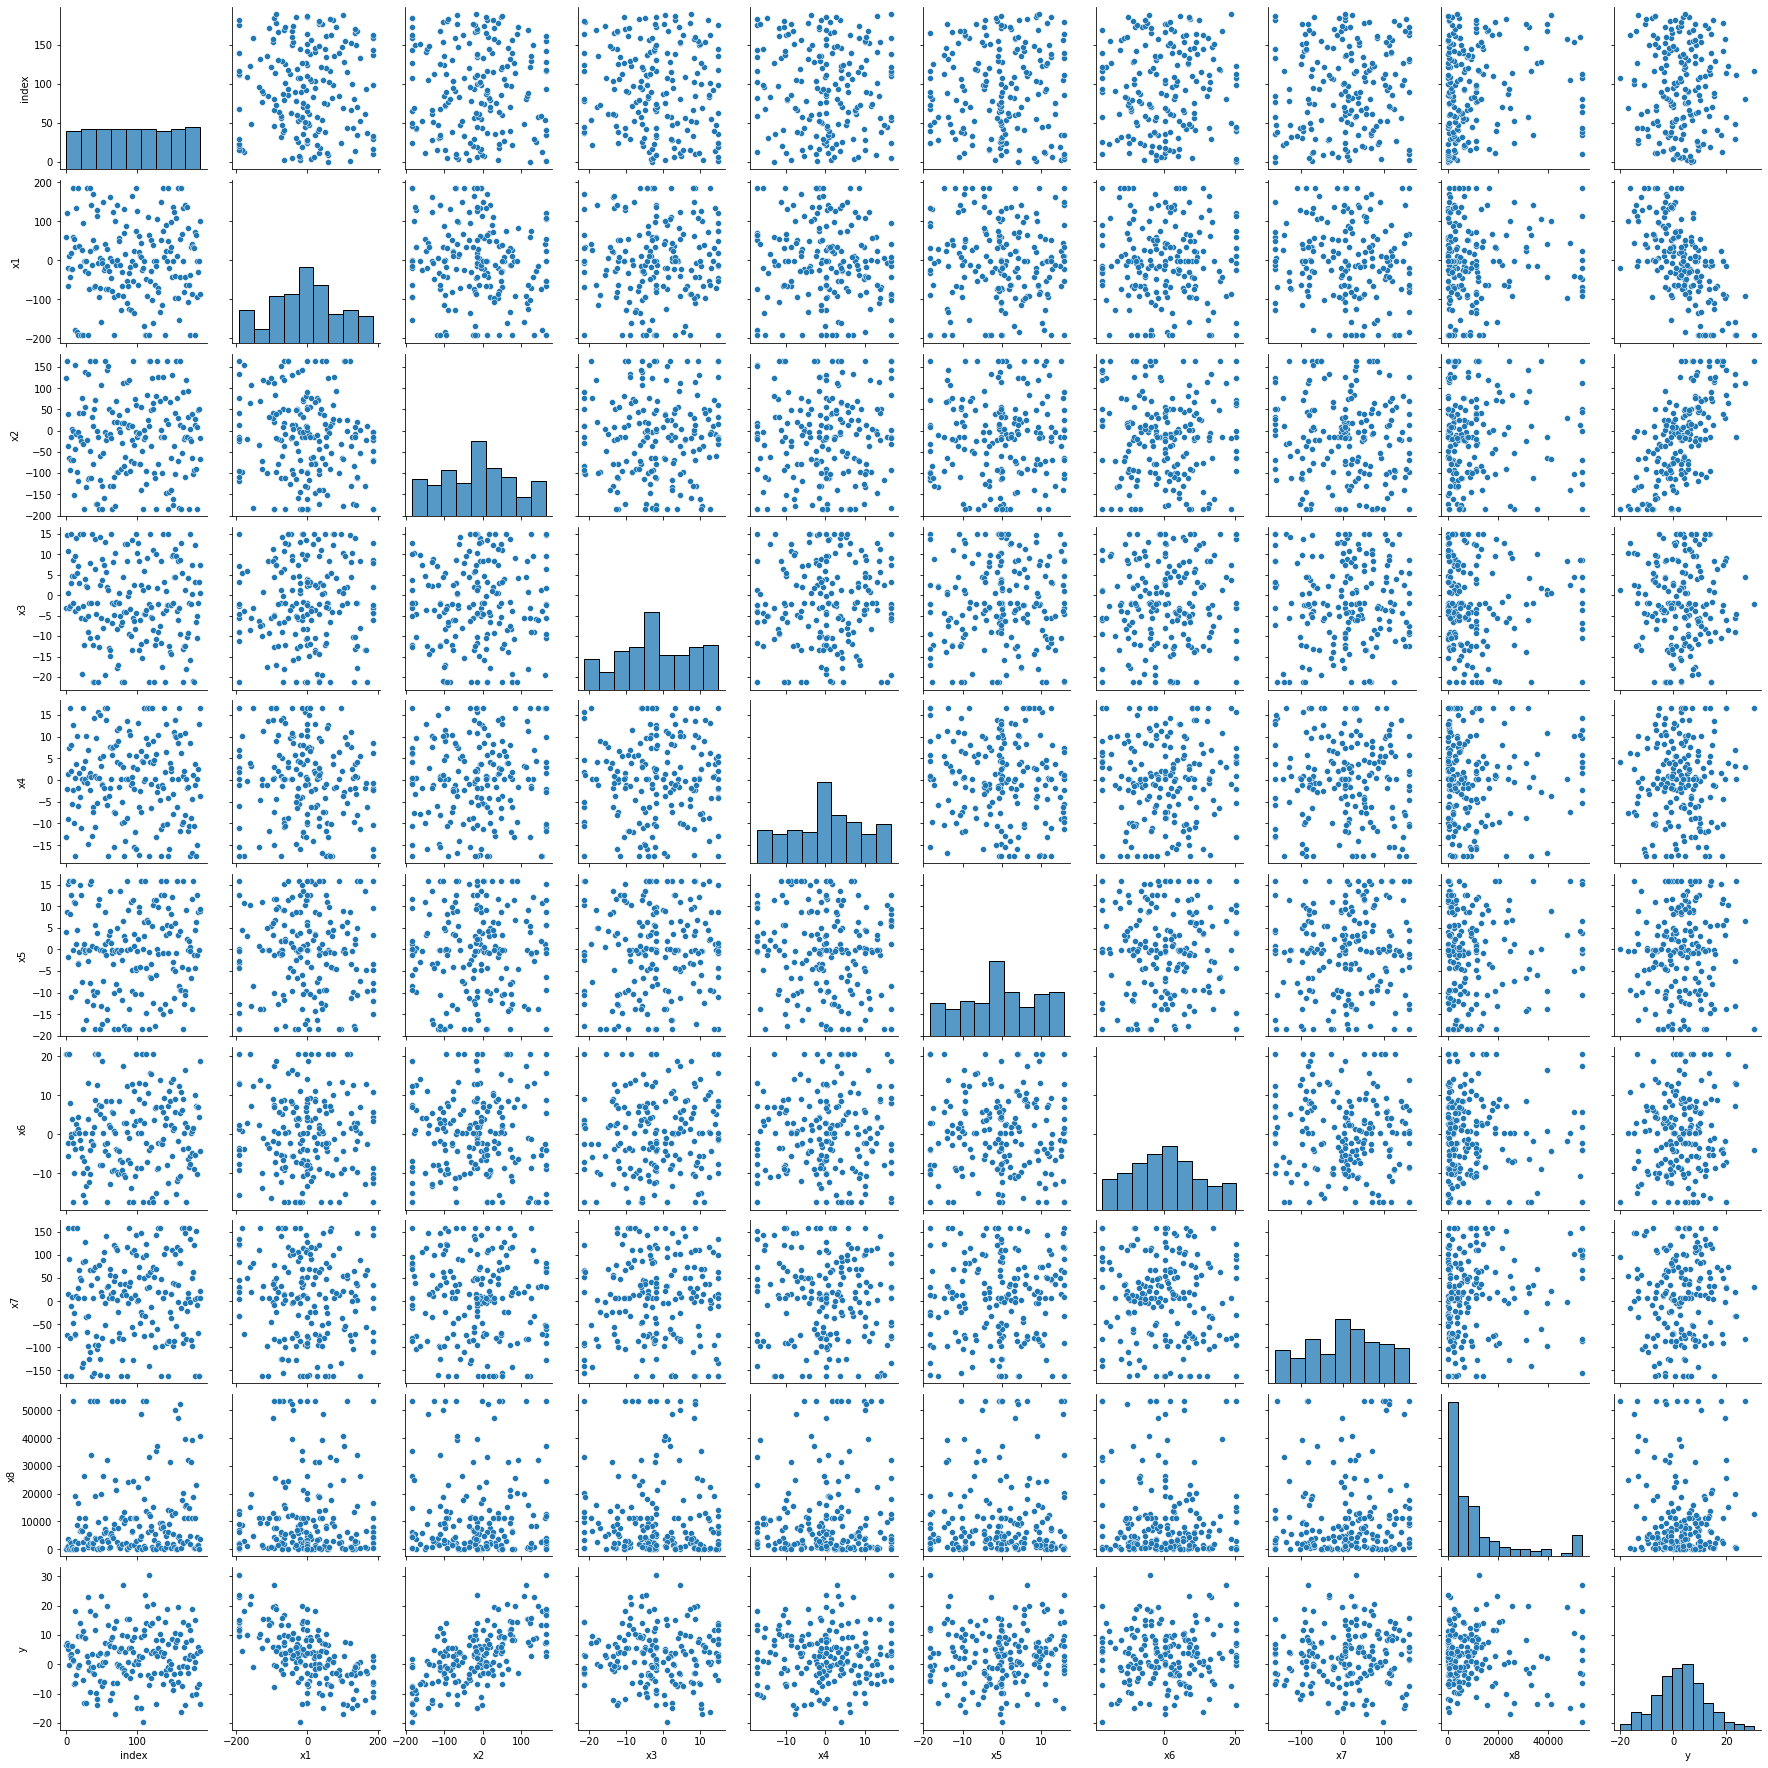

In [ ]:
sns.pairplot(df)

In [ ]:
df.corr()

,index,x1,x2,x3,x4,x5,x6,x7,x8,y
index,1.000000,-0.003282,0.000712,-0.111132,-0.066390,0.017607,0.021368,0.113461,0.101602,-0.025996
x1,-0.003282,1.000000,-0.150121,0.033238,-0.110663,-0.024250,-0.033438,-0.107787,0.022954,-0.612350
x2,0.000712,-0.150121,1.000000,0.035729,0.047236,0.038650,-0.024867,-0.075585,0.008113,0.650340
x3,-0.111132,0.033238,0.035729,1.000000,0.058505,0.056259,0.073054,0.011073,-0.031476,-0.016563
x4,-0.066390,-0.110663,0.047236,0.058505,1.000000,-0.113622,0.032386,-0.062427,0.071553,0.056545
x5,0.017607,-0.024250,0.038650,0.056259,-0.113622,1.000000,-0.000564,0.085270,0.027479,0.073873
x6,0.021368,-0.033438,-0.024867,0.073054,0.032386,-0.000564,1.000000,-0.088009,-0.071384,0.064776
x7,0.113461,-0.107787,-0.075585,0.011073,-0.062427,0.085270,-0.088009,1.000000,0.118292,0.029617
x8,0.101602,0.022954,0.008113,-0.031476,0.071553,0.027479,-0.071384,0.118292,1.000000,-0.061858
y,-0.025996,-0.612350,0.650340,-0.016563,0.056545,0.073873,0.064776,0.029617,-0.061858,1.000000


In [ ]:
X = df[['x1','x2']]
y = df['y']

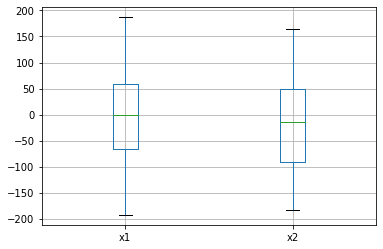

In [ ]:
X.boxplot()

In [ ]:
scaler = preprocessing.StandardScaler().fit(X)
X = pd.DataFrame(scaler.transform(X))

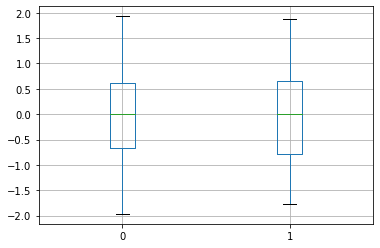

In [ ]:
X.boxplot()

In [ ]:
k = 5
kf = KFold(n_splits=k)

In [ ]:
round_num = 1
RMSEs = []

for train_index, test_index in kf.split(X):
  print("Round", round_num)
  print("  TRAIN:", train_index[0:10],"...")
  print("  TEST:", test_index[0:5],"...")

  X_train, X_test = X.loc[train_index], X.loc[test_index]
  y_train, y_test = y.loc[train_index], y.loc[test_index]

  lm = LinearRegression()
  lm.fit(X_train,y_train)

  y_pred = lm.predict(X_test)

  rmse = mean_squared_error(y_test, y_pred, squared=False)
  print("  RMSE = ", rmse)
  RMSEs.append(rmse)

  print("------------------------------------")
  round_num+=1

Round 1
  TRAIN: [38 39 40 41 42 43 44 45 46 47] ...
  TEST: [0 1 2 3 4] ...
  RMSE =  4.8503963564807675
------------------------------------
Round 2
  TRAIN: [0 1 2 3 4 5 6 7 8 9] ...
  TEST: [38 39 40 41 42] ...
  RMSE =  4.553254794717183
------------------------------------
Round 3
  TRAIN: [0 1 2 3 4 5 6 7 8 9] ...
  TEST: [76 77 78 79 80] ...
  RMSE =  5.972467066544361
------------------------------------
Round 4
  TRAIN: [0 1 2 3 4 5 6 7 8 9] ...
  TEST: [114 115 116 117 118] ...
  RMSE =  4.865656007720413
------------------------------------
Round 5
  TRAIN: [0 1 2 3 4 5 6 7 8 9] ...
  TEST: [151 152 153 154 155] ...
  RMSE =  5.5874357041635845
------------------------------------


In [ ]:
print(RMSEs)
kfold_rmse = np.array(RMSEs).mean()
print("K-Fold CV", "RMSE = ", kfold_rmse)

[4.8503963564807675, 4.553254794717183, 5.972467066544361, 4.865656007720413, 5.5874357041635845]
K-Fold CV RMSE =  5.165841985925262


#Predict

In [ ]:
df_Train = pd.read_csv('https://docs.google.com/spreadsheets/d/e/2PACX-1vTSqsiFnr5ElIAwqer2XJTrdMNNNJ62wXvmsg-dH0S_e8D9lZXPSNVEEeC2F7c9VT-ZGPGqf90ej8N2/pub?gid=1385368211&single=true&output=csv')
df_Test = pd.read_csv('https://docs.google.com/spreadsheets/d/e/2PACX-1vS3Pim8UD6uC_C2LPjtkyVmAqRbnXrXcQ5Oj7JE0KqnHqfZOgN4lhWcSHL_R0Z8XhcmXPagqoYDjEHJ/pub?gid=1435684297&single=true&output=csv')

In [ ]:
low, high = df_Train["x1"].quantile([0.05, 0.95])
df_Train.loc[df_Train[df_Train["x1"]<low].index,"x1"]=low
df_Train.loc[df_Train[df_Train["x1"]>high].index,"x1"]=high

low, high = df_Train["x2"].quantile([0.05, 0.95])
df_Train.loc[df_Train[df_Train["x2"]<low].index,"x2"]=low
df_Train.loc[df_Train[df_Train["x2"]>high].index,"x2"]=high

low, high = df_Train["x3"].quantile([0.05, 0.95])
df_Train.loc[df_Train[df_Train["x3"]<low].index,"x3"]=low
df_Train.loc[df_Train[df_Train["x3"]>high].index,"x3"]=high

low, high = df_Train["x4"].quantile([0.05, 0.95])
df_Train.loc[df_Train[df_Train["x4"]<low].index,"x4"]=low
df_Train.loc[df_Train[df_Train["x4"]>high].index,"x4"]=high

low, high = df_Train["x5"].quantile([0.05, 0.95])
df_Train.loc[df_Train[df_Train["x5"]<low].index,"x5"]=low
df_Train.loc[df_Train[df_Train["x5"]>high].index,"x5"]=high

low, high = df_Train["x6"].quantile([0.05, 0.95])
df_Train.loc[df_Train[df_Train["x6"]<low].index,"x6"]=low
df_Train.loc[df_Train[df_Train["x6"]>high].index,"x6"]=high

low, high = df_Train["x7"].quantile([0.05, 0.95])
df_Train.loc[df_Train[df_Train["x7"]<low].index,"x7"]=low
df_Train.loc[df_Train[df_Train["x7"]>high].index,"x7"]=high

low, high = df_Train["x8"].quantile([0.05, 0.95])
df_Train.loc[df_Train[df_Train["x8"]<low].index,"x8"]=low
df_Train.loc[df_Train[df_Train["x8"]>high].index,"x8"]=high


In [ ]:
df_Train["x1"].fillna(df["x1"].mean(), inplace=True)
df_Train["x2"].fillna(df["x2"].mean(), inplace=True)
df_Train["x3"].fillna(df["x3"].mean(), inplace=True)
df_Train["x4"].fillna(df["x4"].mean(), inplace=True)
df_Train["x5"].fillna(df["x5"].mean(), inplace=True)
df_Train["x6"].fillna(df["x6"].mean(), inplace=True)
df_Train["x7"].fillna(df["x7"].mean(), inplace=True)
df_Train["x8"].fillna(df["x8"].mean(), inplace=True)
df_Train.dropna(subset=['y'], inplace=True)

In [ ]:
df_Test["x1"].fillna(df["x1"].mean(), inplace=True)
df_Test["x2"].fillna(df["x2"].mean(), inplace=True)
df_Test["x3"].fillna(df["x3"].mean(), inplace=True)
df_Test["x4"].fillna(df["x4"].mean(), inplace=True)
df_Test["x5"].fillna(df["x5"].mean(), inplace=True)
df_Test["x6"].fillna(df["x6"].mean(), inplace=True)
df_Test["x7"].fillna(df["x7"].mean(), inplace=True)
df_Test["x8"].fillna(df["x8"].mean(), inplace=True)

In [ ]:
df_Train.reset_index(inplace=True)

In [ ]:
X_train = df_Train[['x1','x2']]
y_train = df_Train['y']

In [ ]:
scaler = preprocessing.StandardScaler().fit(X_train)
X_train = pd.DataFrame(scaler.transform(X_train))

In [ ]:
lm = LinearRegression()
lm.fit(X_train,y_train)

LinearRegression()

In [ ]:
print("Coefficient:", lm.coef_)
print("Intercept:", lm.intercept_)

Coefficient: [-4.86395715  5.24857942]
Intercept: 2.9332978723404253


In [ ]:
df_Test

,x1,x2,x3,x4,x5,x6,x7,x8,y
0,50.690000,-120.500000,-5.930000,7.430000,-16.280000,-9.260000,96.680000,10510.35000,B_01
1,102.080000,74.690000,-4.950000,-2.200000,-4.950000,0.313374,27.300000,36952.37000,B_02
2,-1.142643,49.860000,1.000000,-5.350000,0.720000,-9.810000,6.586919,24768.46000,B_03
3,49.390000,-101.880000,8.690000,-7.540000,-11.280000,4.610000,-15.110000,11429.53032,B_04
4,140.490000,59.990000,0.050000,6.550000,-0.240559,-0.420000,109.930000,2603.04000,B_05
5,54.080000,-14.775665,11.000000,-16.440000,5.310000,17.830000,-90.670000,5.20000,B_06
6,106.480000,-50.550000,16.470000,0.218534,1.340000,-11.530000,138.030000,1753.93000,B_07
7,-83.820000,-104.840000,-1.856536,-13.700000,10.190000,-2.510000,-34.020000,7494.36000,B_08
8,147.150000,9.140000,-3.060000,1.970000,8.140000,26.990000,37.340000,249.96000,B_09
9,8.680000,-207.090000,-4.370000,-10.220000,-5.010000,10.570000,-24.650000,20.43000,B_10


In [ ]:
X_Test = df_Test[['x1','x2']]

In [ ]:
y_pred = lm.predict(X_Test)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


In [ ]:
for x in range(10):
  df_Test.loc[[x],['y_pred']] = y_pred[x]

In [ ]:
df_Test[['y','y_pred']]

,y,y_pred
0,B_01,-876.074510
1,B_02,-101.563051
2,B_03,270.185236
3,B_04,-772.022817
4,B_05,-365.541763
5,B_06,-337.660755
6,B_07,-780.296549
7,B_08,-139.630880
8,B_09,-664.825981
9,B_10,-1126.214163
